In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 导入数据

In [3]:
data = pd.read_excel('data_cn.xlsx')
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## 数据转换为数值

In [4]:
data2 = data.copy()
for column in data.columns:
    data2[column] = pd.factorize(data[column])[0]
data2.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,1
2,2,2,0,1,2,1,2,1,0,0,...,0,2,0,0,1,1,1,1,0,0
3,0,3,1,2,3,1,2,1,0,1,...,1,3,0,1,1,0,1,1,0,0
4,0,4,2,3,4,1,1,2,0,0,...,2,4,0,1,0,0,1,1,0,1


## 数据规范化并划分

In [5]:
from sklearn.model_selection import train_test_split

X = data2.drop('label', axis=1).astype(np.float64).values
y = data2['label'].values

### z-score 规范化

In [6]:
from sklearn.preprocessing import scale
X_scale = scale(X)

### 数据划分

In [7]:
X_train , X_test, y_train,  y_test = train_test_split(X_scale, y, test_size=0.2)

## 使用线性判别分类

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

## 使用决策树分类

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 使用高斯朴素贝叶斯

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

## 使用最邻近算法

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## 使用Logistics回归

In [22]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight={1: 5})
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={1: 5}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 结果评价

In [23]:
y_pre_lda = lda.predict(X_test)
y_pre_dtc = dtc.predict(X_test)
y_pre_gnb = gnb.predict(X_test)
y_pre_knn = knn.predict(X_test)
y_pre_lg = lg.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print('线性判别分析的预测准确度：\t', accuracy_score(y_test, y_pre_lda))
print('决策树分析的预测准确度：\t', accuracy_score(y_test, y_pre_dtc))
print('高斯朴素贝叶斯的预测准确度：\t', accuracy_score(y_test, y_pre_gnb))
print('最邻近算法的预测准确度：\t', accuracy_score(y_test, y_pre_gnb))
print('Logistics回归的预测准确度：\t', accuracy_score(y_test, y_pre_lg))

线性判别分析的预测准确度：	 0.755
决策树分析的预测准确度：	 0.68
高斯朴素贝叶斯的预测准确度：	 0.725
最邻近算法的预测准确度：	 0.725
Logistics回归的预测准确度：	 0.585


In [25]:
y_preds =  dict(LDA=y_pre_lda, DecisionTree=y_pre_dtc, GaussianNB=y_pre_gnb, KNN=y_pre_knn, LogisticRegression=y_pre_lg)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
for name, y_pred in y_preds.items():
    print(name,'准确度:\t', accuracy_score(y_test, y_pred))
    print(name,'准确率:\t', precision_score(y_test, y_pred))
    print(name,'召回率:\t', recall_score(y_test, y_pred))
    print()
    

LDA 准确度:	 0.755
LDA 准确率:	 0.678571428571
LDA 召回率:	 0.322033898305

DecisionTree 准确度:	 0.68
DecisionTree 准确率:	 0.461538461538
DecisionTree 召回率:	 0.508474576271

GaussianNB 准确度:	 0.725
GaussianNB 准确率:	 0.533333333333
GaussianNB 召回率:	 0.542372881356

KNN 准确度:	 0.695
KNN 准确率:	 0.477272727273
KNN 召回率:	 0.35593220339

LogisticRegression 准确度:	 0.585
LogisticRegression 准确率:	 0.410447761194
LogisticRegression 召回率:	 0.932203389831



In [26]:
from sklearn.metrics import confusion_matrix
from plot_comfusion_matrix import *

Confusion matrix, without normalization
[[132   9]
 [ 40  19]]


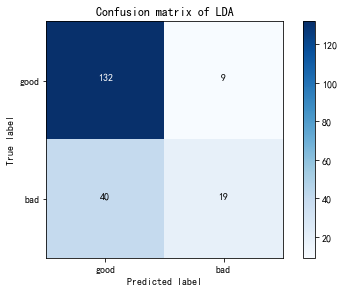




Confusion matrix, without normalization
[[106  35]
 [ 29  30]]


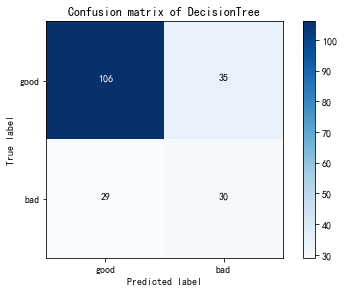




Confusion matrix, without normalization
[[113  28]
 [ 27  32]]


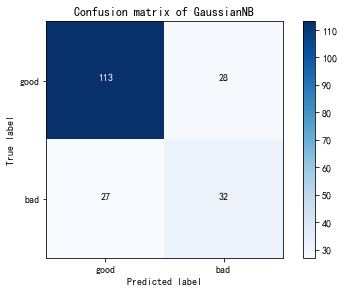




Confusion matrix, without normalization
[[118  23]
 [ 38  21]]


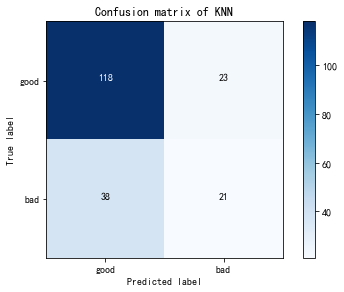




Confusion matrix, without normalization
[[62 79]
 [ 4 55]]


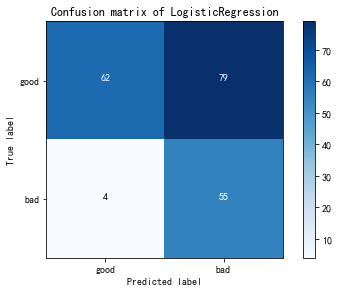

In [27]:
y_preds =  dict(LDA=y_pre_lda, DecisionTree=y_pre_dtc, GaussianNB=y_pre_gnb, KNN=y_pre_knn, LogisticRegression=y_pre_lg)
classs = ['good', 'bad']
for name,y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)    
    plot_confusion_matrix(cm, classes=classs,normalize=False, title='Confusion matrix of {}'.format(name))
    plt.show()
    print('\n\n')